### Goal:
Recommendation system are becoming increasingly important in today's hectic world as people are always in the lookout for services/product that are best suited for them. In this project we are going  build a movie recommendation system for a movie/film streaming app.
The types of recommendation system include:
- Collaborative filtering: this method uses collection and analysis of users preference and activities and predicting what they will like base on similarity with other users.
- Content base filtering: this method is based on the discription of an item and user profile e.g a prediction made base on what the user has liked in the past.
- Hybrid: this combine both Content and Collaborative filtering together.v

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv('titles.csv')
credits = pd.read_csv('credits.csv')
movies

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN


In [2]:
# data analysis
movies.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [3]:
movies.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [4]:
movies['genres'] = [s.strip("[]") for s in movies['genres']]
movies['genres'] = movies['genres'].str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].apply(lambda x: x.split(',')[0])

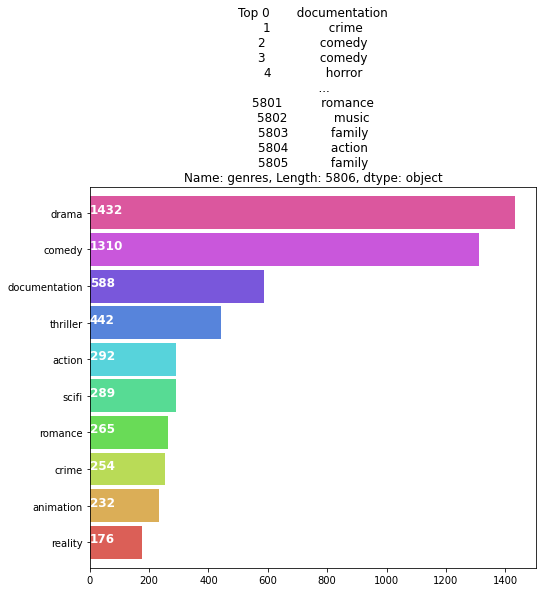

In [5]:
def plotgraph(x):
    plt.subplots(figsize=(8,7))
    list1 = []
    for i in x:
        list1.append(i)
    ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('hls',10))
    for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
        ax.text(.8, i,v,fontsize=12,color='white',weight='bold')
    plt.title(f'Top {x}')
    plt.show()
plotgraph(movies['genres'])

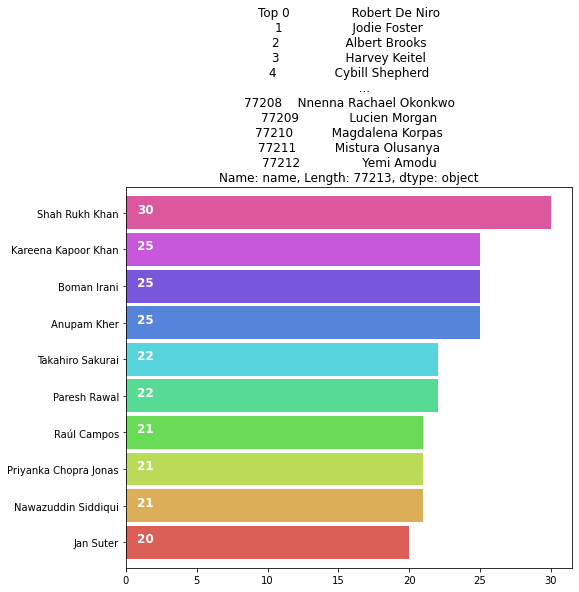

In [6]:
# plot graph of Actors
plotgraph(credits['name'])

In [7]:
credit = credits[credits['role'] == 'DIRECTOR']
credit.shape

(4523, 5)

In [8]:
movies = movies.merge(credit, left_on='id', right_on='id', how='left')
movies = movies[['id', 'title','description','genres','name','role','imdb_score','tmdb_score']]

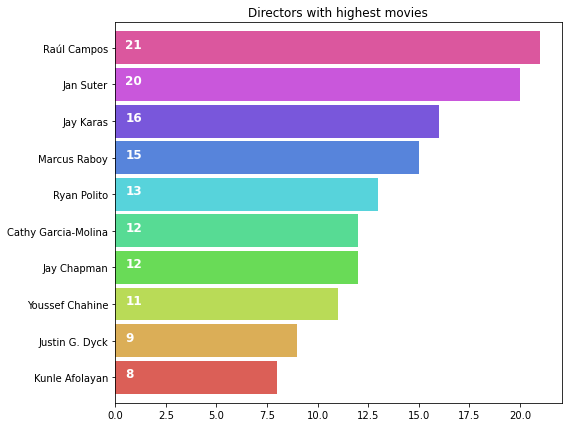

In [9]:
# Top directors
movies.fillna(value='',inplace=True)
plt.subplots(figsize=(8,7))
ax = movies[movies['name'] != ''].name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('hls',10))
for i, v in enumerate(movies[movies['name'] != ''].name.value_counts()[:10].sort_values(ascending=True).values):
    ax.text(.5, i,v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [10]:
genrelist = []
for i in movies['genres']:
    if i not in genrelist:
        genrelist.append(i)
genrelist[:10]
def binary(gen_list):
    binaryList = []
    for genre in genrelist:
        if genre in gen_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [11]:
movies['genre_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genre_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genre_bin, dtype: object

In [12]:
directorList = []
for i in movies['name']:
    if i not in directorList:
        directorList.append(i)

def binary(dir_list):
    binaryList = []
    for dir in directorList:
        if dir in dir_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

movies['director_bin'] = movies['name'].apply(lambda x: binary(x))
movies.head()

,id,title,description,genres,name,role,imdb_score,tmdb_score,genre_bin,director_bin
0,ts300399,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,documentation,,,,,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,tm84618,Taxi Driver,A mentally unstable Vietnam War veteran works ...,crime,Martin Scorsese,DIRECTOR,8.3,8.2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,tm127384,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",comedy,Terry Jones,DIRECTOR,8.2,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,tm127384,Monty Python and the Holy Grail,"King Arthur, accompanied by his squire, recrui...",comedy,Terry Gilliam,DIRECTOR,8.2,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,tm70993,Life of Brian,"Brian Cohen is an average young Jewish man, bu...",comedy,Terry Jones,DIRECTOR,8.0,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [13]:
movies['description'] = movies['description'].str.replace(' ',' ').str.replace("'",'')
movies['description'] = movies['description'].apply(lambda x: x.split(',')[0])

In [14]:
worldList = []
for i in movies['description']:
    if i not in worldList:
        worldList.append(i)

def binary(world_list):
    binaryList = []
    for dir in worldList:
        if dir in world_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

movies['world_bin'] = movies['description'].apply(lambda x: binary(x))
movies.head()

,id,title,description,genres,name,role,imdb_score,tmdb_score,genre_bin,director_bin,world_bin
0,ts300399,Five Came Back: The Reference Films,This collection includes 12 World War II-era p...,documentation,,,,,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,tm84618,Taxi Driver,A mentally unstable Vietnam War veteran works ...,crime,Martin Scorsese,DIRECTOR,8.3,8.2,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,tm127384,Monty Python and the Holy Grail,King Arthur,comedy,Terry Jones,DIRECTOR,8.2,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,tm127384,Monty Python and the Holy Grail,King Arthur,comedy,Terry Gilliam,DIRECTOR,8.2,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,tm70993,Life of Brian,Brian Cohen is an average young Jewish man,comedy,Terry Jones,DIRECTOR,8.0,7.8,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [15]:
# cosine similarity
from scipy import spatial
def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genreA = a['genre_bin']
    genreB = b['genre_bin']
    genreDistance = spatial.distance.cosine(genreA, genreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['world_bin']
    wordsB = b['world_bin']
    wordsDistance = spatial.distance.cosine(wordsA, wordsB)
    return genreDistance + directDistance + wordsDistance

In [16]:
Similarity(3, 120)

1.2928932188134525

In [17]:
print(movies.iloc[3])
print(movies.iloc[120])

id                                                       tm127384
title                             Monty Python and the Holy Grail
description                                           King Arthur
genres                                                     comedy
name                                                Terry Gilliam
role                                                     DIRECTOR
imdb_score                                                    8.2
tmdb_score                                                    7.8
genre_bin       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
director_bin    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
world_bin       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 3, dtype: object
id                                                        ts34435
title                                                Cowboy Bebop
description                                               In 2071
genres                                               

In [18]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['title','genres','imdb_score','genre_bin','new_id','name','director_bin','world_bin']]
# movies.head()

In [25]:
# building prediction score
import operator

def predict_score(name):
    try:
#         name = input('Enter a movie title: ')
        new_movie = movies[movies['title'].str.contains(name)].iloc[0].to_frame().T
        print('Selected mvies: ', new_movie.title.values[0])
        def getNeighbors(baseMovie, K):
            distances = []

            for index, movie in movies.iterrows():
                if movie['new_id'] !=  baseMovie['new_id'].values[0]:
                    dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                    distances.append((movie['new_id'], dist))

            distances.sort(key=operator.itemgetter(1))
            neighbors = []
            for x in range(K):
                neighbors.append(distances[x])
            return neighbors   

        K = 10
        avgRating = 0
        neighbors = getNeighbors(new_movie, K)
        print('\nRecommended Movies: \n')
        for neighbor in neighbors:
            avgRating = avgRating+movies.iloc[neighbor[0]][2]
            print( movies.iloc[neighbor[0]][0]+" | Genres: "+ str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ',' ')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))

        print('\n')
        avgRating = avgRating/K
        print('The predicted rating for %s is: %f '%(new_movie['title'].values[0], avgRating))
        print('The actual rating for %s is %f'%(new_movie['title'].values[0], new_movie['imdb_score']))
    except TypeError:
        print('NULL')
    except IndexError:
        print('No such movie')

In [24]:
predict_score('Avenger')

Selected mvies:  LEGO Marvel Super Heroes: Avengers Reassembled!

Recommended Movies: 

NULL


In [26]:
predict_score('Donnie Drasco')

No such movie


In [29]:
predict_score('Donnie Brasco')

Selected mvies:  Donnie Brasco

Recommended Movies: 

Criminal Minds | Genres: thriller | Rating: 8.1
Unriddle | Genres: thriller | Rating: 8.0
The Gift | Genres: thriller | Rating: 7.1
Riverdale | Genres: thriller | Rating: 6.7
You | Genres: thriller | Rating: 7.7
Signs | Genres: thriller | Rating: 6.4
Getaway Plan | Genres: thriller | Rating: 5.6
Ascharya Fuck It | Genres: thriller | Rating: 5.4
Are You Afraid of the Dark? | Genres: thriller | Rating: 7.1
The Valhalla Murders | Genres: thriller | Rating: 7.1


The predicted rating for Donnie Brasco is: 6.920000 
The actual rating for Donnie Brasco is 7.700000
